# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

refer to this
https://uci.bootcampcontent.com/UCI-Coding-Bootcamp/uci-irv-data-pt-12-2020-u-c/blob/master/Homework/06-Python-APIs/Instructions/starter_code/WeatherPy.ipynb

In [17]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import matplotlib.pyplot as plt
from scipy import stats
import logging
logging.basicConfig(level=logging.DEBUG)

# Import API key
api_key="b7b88b3bd62a120ba8bef3514e063083"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

weather_data_to_load= "weatherpy_data_.csv"
weather_data = pd.read_csv(weather_data_to_load)


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [18]:

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
#for lat_lng in lat_lngs:
 #   city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
  #  if city not in cities:
   #     cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
#cities= ['pevek', 'iqaluit', 'leningradskiy', 'warrnambool', 'panzhihua', 'esperance', 'busselton', 'puerto ayora', 'nikolskoye', 'havelock', 'pangnirtung', 'iskateley', 'mataura', 'vila velha', 'cape town', 'narsaq', 'bambous virieux', 'klaksvik', 'mugumu', 'hauterive', 'carnarvon', 'marienburg', 'dhidhdhoo', 'torbay', 'thompson', 'vaini', 'norman wells', 'new norfolk', 'flinders', 'ancud', 'kapaa', 'mar del plata', 'cidreira', 'trabzon', 'ushuaia', 'georgetown', 'avarua', 'anan', 'kamenskoye', 'jamestown', 'taszar', 'hithadhoo', 'punta arenas', 'cherskiy', 'mubi', 'kieta', 'plettenberg bay', 'berdigestyakh', 'petropavlovsk-kamchatskiy', 'bluff', 'ponta do sol', 'albany', 'saleaula', 'clyde river', 'amderma', 'yellowknife', 'saint george', 'caska', 'andenes', 'payo', 'nha trang', 'illoqqortoormiut', 'sukumo', 'pachelma', 'avera', 'saint-philippe', 'lorengau', 'atar', 'venice', 'faanui', 'belmonte', 'lagoa', 'santa isabel do rio negro', 'buala', 'adrar', 'tasiilaq', 'praia da vitoria', 'aranos', 'beamsville', 'ribeira grande', 'ahipara', 'barentsburg', 'mbekenyera', 'pacific grove', 'rapid valley', 'tumannyy', 'rogun', 'katsuura', 'tuatapere', 'rikitea', 'geraldton', 'vaitupu', 'hermanus', 'bereda', 'port lincoln', 'abhayapuri', 'auki', 'butaritari', 'raymond', 'carauari', 'zhezkazgan', 'omboue', 'iberia', 'port alfred', 'atuona', 'mys shmidta', 'khagaria', 'isla vista', 'bethel', 'chokurdakh', 'krasnyy chikoy', 'airai', 'axim', 'taraz', 'khatanga', 'hobart', 'erenhot', 'nizhneyansk', 'talnakh', 'olga', 'concepcion', 'laguna', 'cortez', 'baykit', 'lubon', 'sawtell', 'sandviken', 'mackenzie', 'kruisfontein', 'castro', 'bon air', 'qaanaaq', 'college', 'guerrero negro', 'grand-lahou', 'bredasdorp', 'taolanaro', 'vestmannaeyjar', 'mildura', 'el balyana', 'shenkursk', 'fortuna', 'townsville', 'callaway', 'barrow', 'cockburn harbour', 'sibolga', 'buren', 'arenapolis', 'galion', 'kulykivka', 'verkhnevilyuysk', 'grindavik', 'lavrentiya', 'belushya guba', 'necochea', 'yumen', 'pisco', 'ust-kuyga', 'east london', 'longyearbyen', 'fairbanks', 'koslan', 'olafsvik', 'ostrovnoy', 'puerto asis', 'nara', 'beringovskiy', 'hilo', 'kloulklubed', 'qui nhon', 'lebu', 'bubaque', 'odweyne', 'mecca', 'kodiak', 'pandelys', 'manicore', 'rzhev', 'deputatskiy', 'sao filipe', 'aklavik', 'hays', 'grand river south east', 'dahuk', 'coos bay', 'saskylakh', 'londoko', 'dieppe', 'irati', 'isiolo', 'krasnoselkup', 'port hardy', 'crossville', 'bom jesus', 'grand gaube', 'puerto del rosario', 'isangel', 'binabalian', 'husavik', 'chuy', 'tsihombe', 'kyaikto', 'waipawa', 'kovdor', 'santa cruz', 'talara', 'bambanglipuro', 'oktyabrskiy', 'karratha', 'kahului', 'kenai', 'dembi dolo', 'taos', 'hami', 'mahebourg', 'nanortalik', 'scarborough', 'babanusah', 'kemin', 'savelugu', 'katghora', 'kolokani', 'leh', 'daokou', 'palabuhanratu', 'ilulissat', 'rantauprapat', 'zhangye', 'san clemente', 'qeshm', 'arraial do cabo', 'shitanjing', 'warmbad', 'nizwa', 'dikson', 'crab hill', 'klyuchevskiy', 'kavaratti', 'jacareacanga', 'sabha', 'baryatino', 'caracollo', 'asau', 'tunceli', 'itaituba', 'kurmanayevka', 'rio tercero', 'minab', 'pundaguitan', 'kuche', 'vale da amoreira', 'araouane', 'khasan', 'vila franca do campo', 'victoria', 'firovo', 'masterton', 'saint-pierre', 'sohag', 'viligili', 'cabo san lucas', 'leninsk-kuznetskiy', 'gambela', 'niksar', 'louisbourg', 'uribia', 'mason city', 'prieska', 'mikkeli', 'port elizabeth', 'kamaishi', 'eyl', 'nizhniy odes', 'anchorage', 'camacha', 'chapais', 'severo-kurilsk', 'krasnousolskiy', 'acapulco', 'mandalay', 'katobu', 'sentyabrskiy', 'yirol', 'bacalar', 'tuktoyaktuk', 'tessalit', 'faya', 'komsomolskiy', 'mahon', 'lydenburg', 'inhambane', 'srandakan', 'lethem', 'yazykovo', 'souillac', 'tiksi', 'lompoc', 'sorvag', 'samusu', 'vostok', 'alice springs', 'kholodnyy', 'hongjiang', 'albion', 'vardo', 'ust-kamchatsk', 'crestline', 'nizhniy kuranakh', 'aporawan', 'aksarka', 'shenzhen', 'hirara', 'attawapiskat', 'san quintin', 'ryotsu', 'ugoofaaru', 'visnes', 'susanville', 'mrirt', 'touros', 'athabasca', 'alofi', 'la rioja', 'aswan', 'daru', 'buraydah', 'lincoln', 'lappeenranta', 'marquette', 'gimli', 'dipkarpaz', 'cockburn town', 'celestun', 'codrington', 'korla', 'virginia beach', 'ola', 'saldanha', 'barawe', 'coruripe', 'lewistown', 'burnie', 'tambul', 'sao joao da barra', 'comodoro rivadavia', 'luderitz', 'yerbogachen', 'muisne', 'ekibastuz', 'dhoraji', 'batagay-alyta', 'paamiut', 'parangan', 'mizpe ramon', 'saint-joseph', 'shirgaon', 'wamba', 'neiafu', 'fomboni', 'zyryanovsk', 'lasa', 'pingliang', 'kalyazin', 'yar-sale', 'chimbote', 'sedelnikovo', 'umm kaddadah', 'galle', 'ballina', 'trairi', 'kaitangata', 'xining', 'graham', 'fort nelson', 'bor', 'bengkulu', 'toliary', 'banjar', 'upernavik', 'novikovo', 'cururupu', 'namatanai', 'bolu', 'traiguen', 'utiroa', 'bilibino', 'ambanja', 'the hammocks', 'road town', 'poum', 'upington', 'kualakapuas', 'natitingou', 'gurupi', 'barbar', 'karatsu', 'broome', 'kabompo', 'punta alta', 'phuket', 'cayenne', 'mackay', 'satitoa', 'nome', 'arawa', 'muzhi', 'benjamin constant', 'bonavista', 'mendi', 'griffith', 'urusha', 'fevralsk', 'itupiranga', 'bandarbeyla', 'evensk', 'ixtapa', 'san cristobal', 'bosaso', 'zhangjiakou', 'port hedland', 'rapid city', 'chinhoyi', 'madang', 'zabaykalsk', 'sorland', 'constitucion', 'labuhan', 'kutulik', 'haines junction', 'ormara', 'huangchuan', 'gat', 'inirida', 'neuquen', 'toguchin', 'tyumentsevo', 'macaboboni', 'armizonskoye', 'mount isa', 'bilma', 'te anau', 'sibu', 'singaraja', 'chaumont', 'rawannawi', 'batemans bay', 'lotoshino', 'wukari', 'meyungs', 'ban nahin', 'mata', 'dwarka', 'cacapava do sul', 'thung song', 'san angelo', 'salinopolis', 'sambava', 'belle fourche', 'sobolevo', 'port blair', 'artyk', 'jhelum', 'hasaki', 'yaan', 'mormugao', 'wad rawah', 'vryburg', 'opobo', 'san carlos', 'beloha', 'morehead', 'uchiza', 'hihifo', 'sitka', 'neumunster', 'nouakchott', 'meulaboh', 'kroya', 'xuddur', 'pimentel', 'kaeo', 'pathein', 'shirakawa', 'balkhash', 'noumea', 'baherden', 'pierre', 'severnyy', 'zonguldak', 'portland', 'koumac', 'sarkand', 'abu samrah', 'tilichiki', 'biloela', 'saint-augustin', 'huadian', 'provideniya', 'glens falls', 'gizo', 'yining', 'spornoye', 'baracoa', 'albemarle', 'rio gallegos', 'dunmore town', 'paracuru', 'pokosnoye', 'qibili', 'baruun-urt', 'lata', 'wanning', 'morant bay', 'antalaha', 'lensk', 'pandan', 'vanavara', 'birjand', 'sai buri', 'kassala', 'taloqan', 'atasu', 'seminole', 'oussouye', 'victor harbor', 'skaudvile', 'muyezerskiy', 'riachao', 'desa', 'tornabe', 'champoton', 'tongsa', 'madaoua', 'rocha', 'sosnogorsk', 'mae tha', 'surab', 'akdepe', 'maceio', 'assiniboia', 'mangrol', 'chagda', 'shaunavon', 'skjervoy', 'yashkul', 'nalut', 'calvinia', 'san ramon', 'la ciotat', 'sao geraldo do araguaia', 'yulara', 'fare', 'pacifica', 'basco', 'hualmay', 'vao', 'bad frankenhausen', 'paracatu', 'san pedro', 'cumaribo', 'bowen', 'eregli', 'porto walter', 'solnechnyy', 'hofn', 'aykhal', 'castle rock', 'bargal', 'nelson bay', 'elban', 'kamenka', 'dukat', 'parkes', 'hamilton', 'tocopilla', 'vilhena', 'bonnyville', 'chalinze', 'umzimvubu', 'balabac', 'bongandanga', 'fort dix', 'calbuco', 'bathsheba', 'sao jose da coroa grande', 'amapa', 'leshukonskoye', 'richards bay', 'altamira', 'nichinan', 'ust-maya', 'talwara', 'betare oya', 'mareeba', 'ayan', 'salalah', 'tirumullaivasal', 'pangody', 'zhigansk', 'mustafakemalpasa', 'chimoio', 'hobyo', 'warqla', 'patacamaya', 'yanam', 'mountain home', 'namibe', 'pailon', 'iquitos', 'bandar-e torkaman', 'birao', 'negombo', 'san patricio', 'isabela', 'tuensang', 'cedar city', 'benghazi', 'chiang kham', 'talcahuano', 'kautokeino', 'suntar', 'west odessa', 'afsin', 'abha', 'north myrtle beach', 'karaul', 'la ronge', 'mawlamyine', 'ocean city', 'srednekolymsk', 'kijang', 'hirado', 'juterbog', 'jalu', 'phumi samraong']
len(cities)

636

#print(weather_data)
#type(weather_data)

 # create a data frame from cities, lat, and temp
weather_dict = {
    "citylist": citylist,
    "country": country, 
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "temp_max": temp_max,
    "cloudiness": cloudiness,
    "humidity": humidity,
    "windspeed": windspeed,
    "date": date,
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data

##Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

##Perform API Calls

    Perform a weather check on each city using a series of successive API calls.
    Include a print log of each city as it'sbeing processed (with the city number and city name).



country= []
lat= []
lon= []
temp= []
temp_max= []
cloudiness= []
humidity= []
date= []
citylist= []
windspeed=[]

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        citylist.append(response['name'])
        windspeed.append(response['wind']['speed'])
    except (KeyError):
        print('working to spread the love especially for AK 4711')

In [25]:
print(weather_data)

             citylist country      lat       lon   temp  temp_max  cloudiness  \
0             Ushuaia      AR -54.8000  -68.3000  16.00     16.00          20   
1         East London      ZA -33.0153   27.9116  26.11     26.11          50   
2              Torbay      CA  47.6666  -52.7314  -0.66      0.00          90   
3       San Cristobal      VE   7.7669  -72.2250  33.00     33.00          40   
4           Tuatapere      NZ -46.1333  167.6833  10.56     10.56          99   
..                ...     ...      ...       ...    ...       ...         ...   
561           Illapel      CL -31.6308  -71.1653  26.70     26.70           0   
562          Almaznyy      RU  48.0448   40.0450  -2.00     -2.00          75   
563           Yacuiba      BO -22.0380  -63.6797  29.22     29.22          51   
564  Glenwood Springs      US  39.5505 -107.3248   0.73      4.44          90   
565             Falam      MM  22.9167   93.6833  10.10     10.10          61   

     humidity  windspeed   

In [27]:
wdf= weather_data

In [28]:
len(wdf['temp'])

566

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
 # create a data frame from cities, lat, and temp
weather_dict = {
    "citylist": citylist,
    "country": country, 
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "temp_max": temp_max,
    "cloudiness": cloudiness,
    "humidity": humidity,
    "windspeed": windspeed,
    "date": date,
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
0,Pevek,RU,69.7008,170.3133,-28.32,-28.32,100,89,2.65,1613155054
1,Iqaluit,CA,63.7506,-68.5145,-18.00,-18.00,40,71,10.29,1613154821
2,Leningradskiy,RU,69.3833,178.4167,-28.85,-28.85,99,82,4.58,1613155110
3,Warrnambool,AU,-38.3833,142.4833,13.89,13.89,43,92,4.48,1613155111
4,Panzhihua,CN,26.5851,101.7128,7.22,7.22,0,62,0.20,1613155111
...,...,...,...,...,...,...,...,...,...,...
573,Srednekolymsk,RU,67.4500,153.6833,-33.39,-33.39,0,83,2.59,1613155494
574,Gijang,KR,35.2442,129.2139,6.00,6.00,0,70,2.57,1613155495
575,Hirado,JP,33.3597,129.5531,10.39,11.67,100,47,3.40,1613155495
576,Jüterbog,DE,51.9833,13.0833,-7.14,-5.56,0,85,1.03,1613155495


In [29]:
type(weather_data)

pandas.core.frame.DataFrame

In [72]:
#weather_data.to_csv(index=False)
#http://localhost:8888/notebooks/Desktop/Resources/Homework/python-api-challenge/WeatherPy/WP_FINAL.ipynb
#weather_data.to_csv('weatherpy_data_.csv', index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
humid100= (weather_data["humidity"]>100)
humid100.value_counts()

False    566
Name: humidity, dtype: int64

In [74]:
#  Get the indices of cities that have humidity over 100%.

# NOTE:  No cities have a humidity value over 100

In [75]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


                          

{
  "coord": {
    "lon": -122.08,
    "lat": 37.39
  },
  "weather": [
    {
      "id": 800,
      "main": "Clear",
      "description": "clear sky",
      "icon": "01d"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 282.55,
    "feels_like": 281.86,
    "temp_min": 280.37,
    "temp_max": 284.26,
    "pressure": 1023,
    "humidity": 100
  },
  "visibility": 16093,
  "wind": {
    "speed": 1.5,
    "deg": 350
  },
  "clouds": {
    "all": 1
  },
  "dt": 1560350645,
  "sys": {
    "type": 1,
    "id": 5122,
    "message": 0.0139,
    "country": "US",
    "sunrise": 1560343627,
    "sunset": 1560396563
  },
  "timezone": -25200,
  "id": 420006353,
  "name": "Mountain View",
  "cod": 200
  }                         

    

                    
 # create a data frame from cities, lat, and temp
weather_dict = {
    "citylist": citylist,
    "country": country, 
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "temp_max": temp_max,
    "cloudiness": cloudiness,
    "humidity": humidity,
    "date": date,
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [42]:
%matplotlib notebook
# Dependencies
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import requests
import time
import random

DEBUG:matplotlib.pyplot:Loaded backend nbAgg version unknown.


<IPython.core.display.Javascript object>


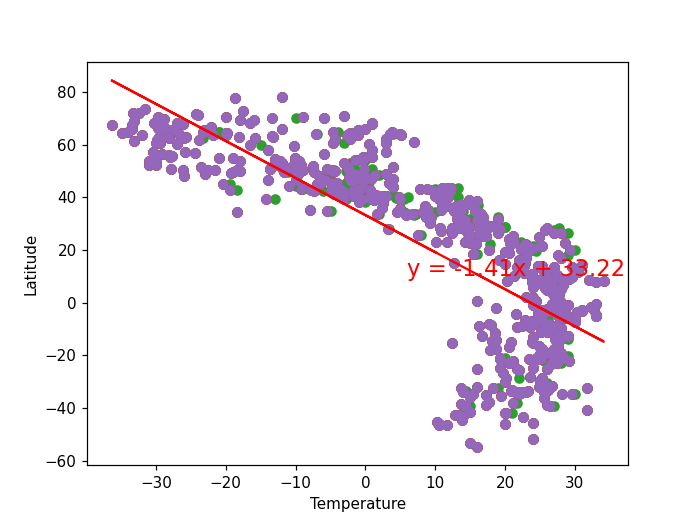

In [44]:
plt.scatter(x=wdf['temp'], y=wdf['lat'])
plt.show()

In [45]:
 # Plot out lat and temp
x_values = wdf['temp']
y_values = wdf['lat']
plt.scatter(x_values,y_values)
plt.xlabel('temperature')
plt.ylabel('latitude')
plt.show()

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 4

x = (wdf['lat'])

y = (wdf['humidity'])
colors = np.random.rand(N)
area = (7 * N ** 2)  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


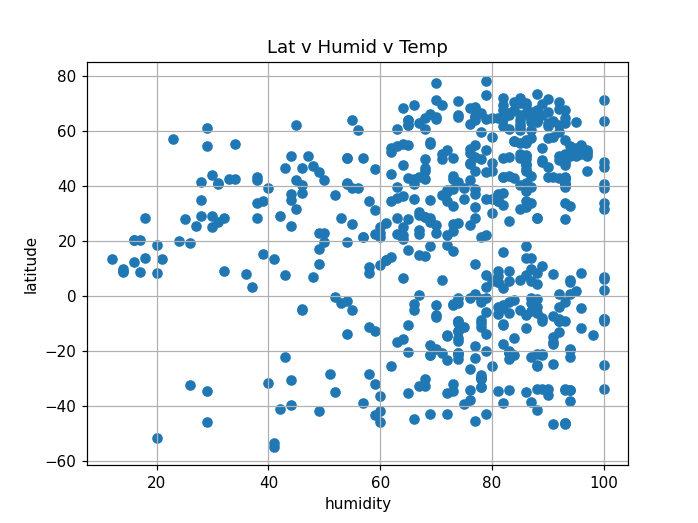

In [39]:
# Build a scatter plot for each data type
plt.scatter(wdf["humidity"], wdf["lat"], marker="o")

# Incorporate the other graph properties
plt.title("Lat v Humid v Temp")
plt.ylabel("latitude")
plt.xlabel("humidity")
plt.grid(True)

# Save the figure
plt.savefig("HumidityandLatitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


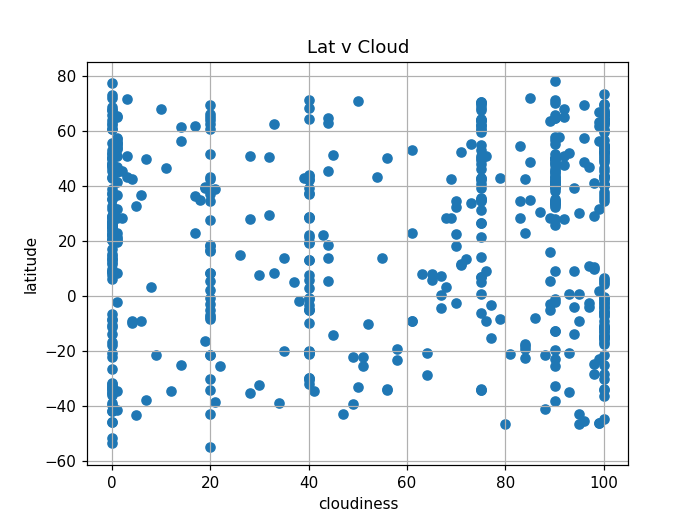

In [40]:
# Build a scatter plot for each data type
plt.scatter(wdf["cloudiness"], wdf["lat"], marker="o")

# Incorporate the other graph properties
plt.title("Lat v Cloud")
plt.ylabel("latitude")
plt.xlabel("cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("latvcloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


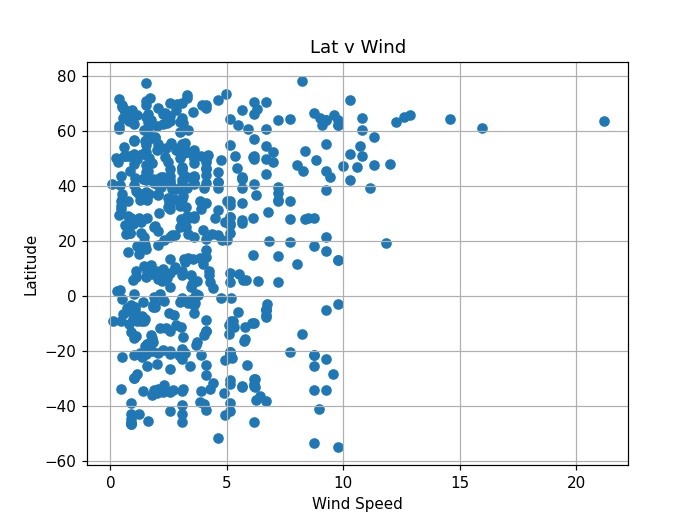

In [41]:
# Build a scatter plot for each data type
plt.scatter(wdf["windspeed"], wdf["lat"], marker="o")

# Incorporate the other graph properties
plt.title("Lat v Wind")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Lat v Wind.png")

# Show plot
plt.show()

## Linear Regression

 # create a data frame from cities, lat, and temp


In [55]:
%matplotlib notebook
# Dependencies
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import requests
import time
import random


DEBUG:matplotlib.pyplot:Loaded backend nbAgg version unknown.


In [57]:
wdf

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
0,Ushuaia,AR,-54.8000,-68.3000,16.00,16.00,20,41,9.77,1613158703
1,East London,ZA,-33.0153,27.9116,26.11,26.11,50,78,6.20,1613158904
2,Torbay,CA,47.6666,-52.7314,-0.66,0.00,90,86,11.32,1613158904
3,San Cristobal,VE,7.7669,-72.2250,33.00,33.00,40,43,3.09,1613158800
4,Tuatapere,NZ,-46.1333,167.6833,10.56,10.56,99,93,0.89,1613158904
...,...,...,...,...,...,...,...,...,...,...
561,Illapel,CL,-31.6308,-71.1653,26.70,26.70,0,40,4.42,1613159198
562,Almaznyy,RU,48.0448,40.0450,-2.00,-2.00,75,86,12.00,1613159273
563,Yacuiba,BO,-22.0380,-63.6797,29.22,29.22,51,43,3.02,1613159274
564,Glenwood Springs,US,39.5505,-107.3248,0.73,4.44,90,93,7.20,1613159172


<IPython.core.display.Javascript object>


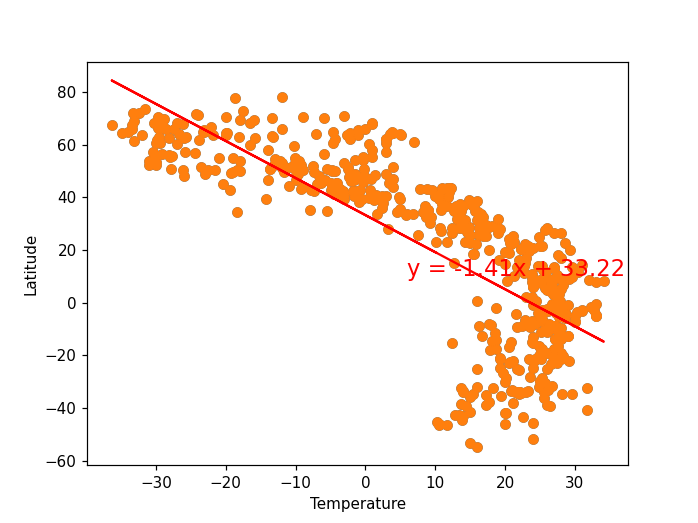

In [68]:
# start with values and labels
x_values = wdf['temp']
y_values = wdf['lat']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.show()

In [69]:
x_values = wdf["temp"] 
y_values = wdf["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [70]:
 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Time')
#plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6088474667937398


In [67]:
# Plot out temp over time 
x_values = wdf["temp_max"] 
y_values = wdf["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Temperature") 
plt.ylabel("Latitude") 
plt.show()

In [122]:
weather_data

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date,latn
0,Ushuaia,AR,-54.8000,-68.3000,16.00,16.00,20,41,9.77,1613158703,False
1,East London,ZA,-33.0153,27.9116,26.11,26.11,50,78,6.20,1613158904,False
2,Torbay,CA,47.6666,-52.7314,-0.66,0.00,90,86,11.32,1613158904,True
3,San Cristobal,VE,7.7669,-72.2250,33.00,33.00,40,43,3.09,1613158800,True
4,Tuatapere,NZ,-46.1333,167.6833,10.56,10.56,99,93,0.89,1613158904,False
...,...,...,...,...,...,...,...,...,...,...,...
561,Illapel,CL,-31.6308,-71.1653,26.70,26.70,0,40,4.42,1613159198,False
562,Almaznyy,RU,48.0448,40.0450,-2.00,-2.00,75,86,12.00,1613159273,True
563,Yacuiba,BO,-22.0380,-63.6797,29.22,29.22,51,43,3.02,1613159274,False
564,Glenwood Springs,US,39.5505,-107.3248,0.73,4.44,90,93,7.20,1613159172,True


In [133]:
wdn= weather_data.loc[weather_data['lat'] > 0]
wdn

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date,latn
2,Torbay,CA,47.6666,-52.7314,-0.66,0.00,90,86,11.32,1613158904,True
3,San Cristobal,VE,7.7669,-72.2250,33.00,33.00,40,43,3.09,1613158800,True
5,Dikson,RU,73.5069,80.5464,-31.60,-31.60,100,88,4.98,1613158905,True
7,Heihe,CN,50.2441,127.4902,-9.00,-9.00,0,57,3.00,1613158905,True
8,Tiksi,RU,71.6872,128.8694,-24.28,-24.28,3,90,0.38,1613158906,True
...,...,...,...,...,...,...,...,...,...,...,...
559,Vuktyl,RU,63.8567,57.3094,-26.66,-26.66,100,88,0.85,1613159198,True
560,Lavrentiya,RU,65.5833,-171.0000,-23.07,-23.07,100,89,9.59,1613159198,True
562,Almaznyy,RU,48.0448,40.0450,-2.00,-2.00,75,86,12.00,1613159273,True
564,Glenwood Springs,US,39.5505,-107.3248,0.73,4.44,90,93,7.20,1613159172,True


In [132]:
wds= weather_data.loc[weather_data['lat']<0]
wds

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date,latn
0,Ushuaia,AR,-54.8000,-68.3000,16.00,16.00,20,41,9.77,1613158703,False
1,East London,ZA,-33.0153,27.9116,26.11,26.11,50,78,6.20,1613158904,False
4,Tuatapere,NZ,-46.1333,167.6833,10.56,10.56,99,93,0.89,1613158904,False
6,Punta Arenas,CL,-53.1500,-70.9167,15.00,15.00,0,41,8.75,1613158905,False
9,Vaini,TO,-21.2000,-175.2000,27.00,27.00,40,89,2.57,1613158685,False
...,...,...,...,...,...,...,...,...,...,...,...
551,Calbuco,CL,-41.7680,-73.1273,20.00,20.00,0,60,5.14,1613159196,False
555,Waipawa,NZ,-41.4122,175.5153,15.00,15.00,1,88,4.12,1613159197,False
557,Saint-Pierre,RE,-21.3393,55.4781,25.18,27.00,20,69,8.75,1613159197,False
561,Illapel,CL,-31.6308,-71.1653,26.70,26.70,0,40,4.42,1613159198,False


In [134]:
####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


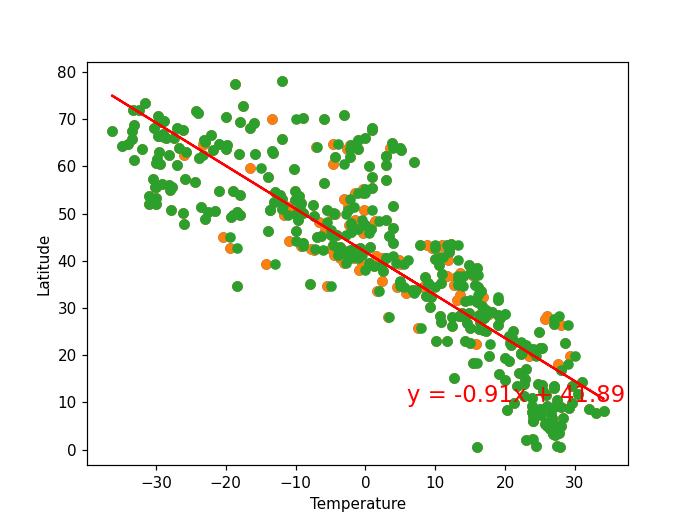

The r-squared is: 0.7527042243704315


In [139]:
# start with values and labels
x_values = wdn['temp']
y_values = wdn['lat']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.show()

x_values = wdn["temp"] 
y_values = wdn["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Time')
#plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out temp over time 
x_values = wdn["temp_max"] 
y_values = wdn["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Temperature") 
plt.ylabel("Latitude") 
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


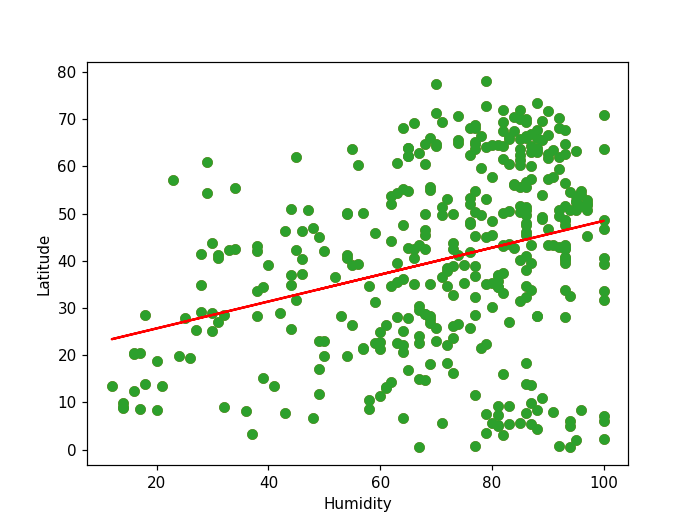

The r-squared is: 0.09261397948294228


In [140]:
# start with values and labels
x_values = wdn['humidity']
y_values = wdn['lat']
plt.scatter(x_values,y_values)
plt.xlabel('humidityerature')
plt.ylabel('Latitude')
plt.show()

x_values = wdn["humidity"] 
y_values = wdn["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Time')
#plt.ylabel(‘Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out humidity over time 
x_values = wdn["humidity"] 
y_values = wdn["lat"] 
plt.scatter(x_values,y_values)
plt.xlabel("Humidity")
plt.ylabel("Latitude") 
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


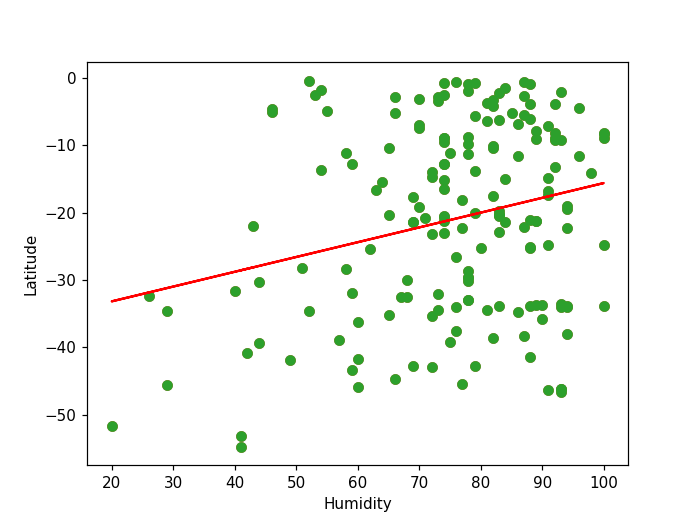

The r-squared is: 0.061369621904910354


In [142]:

# start with values and labels
x_values = wds['humidity']
y_values = wds['lat']
plt.scatter(x_values,y_values)
plt.xlabel('humidityerature')
plt.ylabel('Latitude')
plt.show()

x_values = wds["humidity"] 
y_values = wds["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Time')
#plt.ylabel(‘Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out humidity over time 
x_values = wds["humidity"] 
y_values = wds["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Humidity") 
plt.ylabel("Latitude") 
plt.show()



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


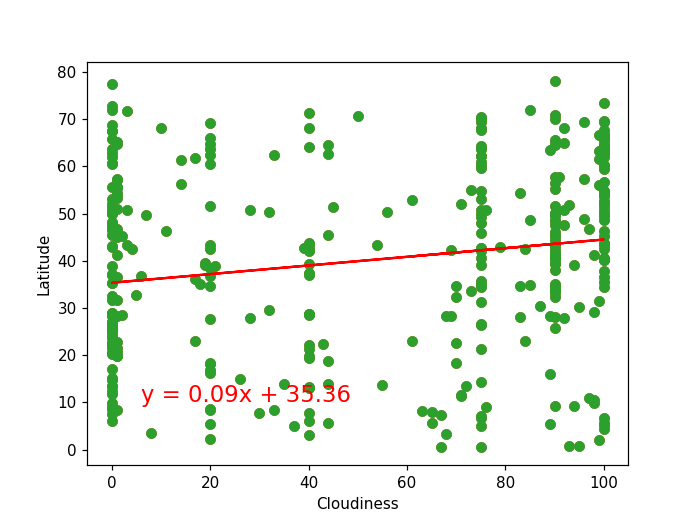

The r-squared is: 0.03461969997817402


In [144]:
# start with values and labels
x_values = wdn['cloudiness']
y_values = wdn['lat']
plt.scatter(x_values,y_values)
plt.xlabel('cloudinesserature')
plt.ylabel('Latitude')
plt.show()

x_values = wdn["cloudiness"] 
y_values = wdn["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel(‘L’atitude)
#plt.ylabel(‘cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out cloudiness over time 
x_values = wdn["cloudiness"] 
y_values = wdn["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Cloudiness") 
plt.ylabel("Latitude") 
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


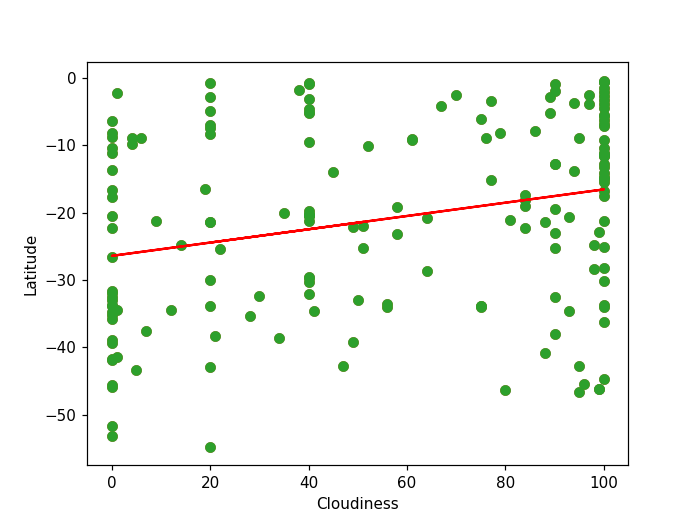

The r-squared is: 0.07384624606654731


In [145]:
# start with values and labels
x_values = wds['cloudiness']
y_values = wds['lat']
plt.scatter(x_values,y_values)
plt.xlabel('cloudinesserature')
plt.ylabel('Latitude')
plt.show()

x_values = wds["cloudiness"] 
y_values = wds["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel(‘L’atitude)
#plt.ylabel(‘cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out cloudiness over time 
x_values = wds["cloudiness"] 
y_values = wds["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Cloudiness") 
plt.ylabel("Latitude") 
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


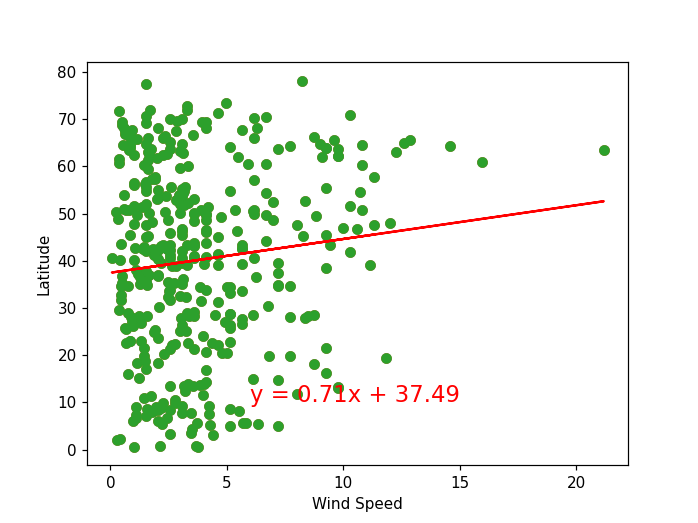

The r-squared is: 0.012450921892020477


In [154]:
# start with values and labels
x_values = wdn['windspeed']
y_values = wdn['lat']
plt.scatter(x_values,y_values)
plt.xlabel('windspeederature')
plt.ylabel('Latitude')
plt.show()

x_values = wdn["windspeed"] 
y_values = wdn["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel(‘Latitude)
#plt.ylabel(‘windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out windspeed over time 
x_values = wdn["windspeed"] 
y_values = wdn["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Wind Speed") 
plt.ylabel("Latitude") 
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


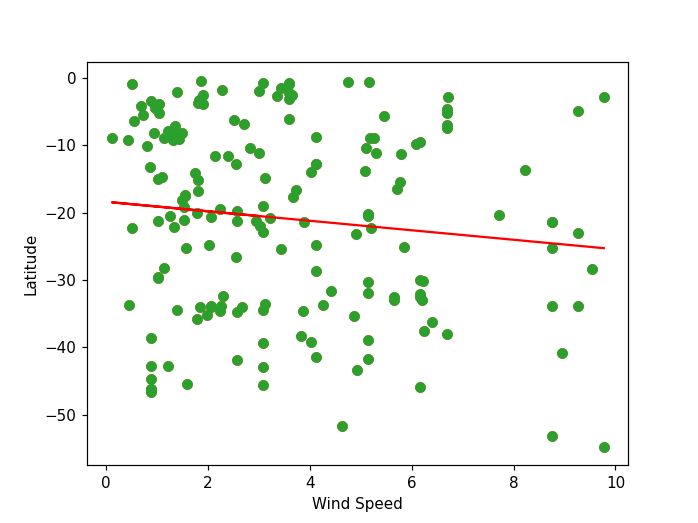

The r-squared is: 0.014399496789090709


In [148]:
# start with values and labels
x_values = wds['windspeed']
y_values = wds['lat']
plt.scatter(x_values,y_values)
plt.xlabel('windspeederature')
plt.ylabel('Latitude')
plt.show()

x_values = wds["windspeed"] 
y_values = wds["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel(‘Latitude)
#plt.ylabel(‘windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out windspeed over time 
x_values = wds["windspeed"] 
y_values = wds["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Wind Speed") 
plt.ylabel("Latitude") 
plt.show()